In [1]:
import sys
sys.path.insert(1, './env')
sys.path.insert(1, './agents')

import gym
import pylab
import random
import strategy_imitation, sarsa, ddqn, random_agent, a2c, model_based
import aa_gun
import numpy as np
from collections import deque
import keras
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


In [2]:
#массовый тест моделей

_____ random 0 2020-01-31 18:10:10.909119
hit
episode: 0   score: 1.9375 1.9375   memory length: 0   epsilon: 1
hit
episode: 1   score: 1.875 1.90625   memory length: 0   epsilon: 1
hit
hit
episode: 2   score: 3.5625 2.4583333333333335   memory length: 0   epsilon: 1
hit
episode: 3   score: 1.1875 2.140625   memory length: 0   epsilon: 1
episode: 4   score: 0.625 1.8375   memory length: 0   epsilon: 1
episode: 5   score: 1.6875 1.8125   memory length: 0   epsilon: 1
hit
episode: 6   score: 1.3125 1.7410714285714286   memory length: 0   epsilon: 1
hit
hit
hit
episode: 7   score: 3.625 1.9765625   memory length: 0   epsilon: 1
episode: 8   score: 1.375 1.9097222222222223   memory length: 0   epsilon: 1
episode: 9   score: 0.9375 1.8125   memory length: 0   epsilon: 1
episode: 10   score: 1.4375 1.7784090909090908   memory length: 0   epsilon: 1
episode: 11   score: 0.5625 1.6770833333333333   memory length: 0   epsilon: 1
episode: 12   score: 1.25 1.6442307692307692   memory length: 0   

episode: 106   score: 1.5625 1.3393691588785046   memory length: 0   epsilon: 1
episode: 107   score: 0.1875 1.3287037037037037   memory length: 0   epsilon: 1
hit
episode: 108   score: 1.5 1.3302752293577982   memory length: 0   epsilon: 1
episode: 109   score: 0.875 1.3261363636363637   memory length: 0   epsilon: 1
hit
episode: 110   score: 2.4375 1.3361486486486487   memory length: 0   epsilon: 1
episode: 111   score: 0.75 1.3309151785714286   memory length: 0   epsilon: 1
episode: 112   score: 0.625 1.3246681415929205   memory length: 0   epsilon: 1
episode: 113   score: 1.0625 1.3223684210526316   memory length: 0   epsilon: 1
hit
episode: 114   score: 1.125 1.3206521739130435   memory length: 0   epsilon: 1
hit
episode: 115   score: 1.3125 1.3205818965517242   memory length: 0   epsilon: 1
episode: 116   score: 0.6875 1.3151709401709402   memory length: 0   epsilon: 1
episode: 117   score: 0.75 1.3103813559322033   memory length: 0   epsilon: 1
episode: 118   score: 1.75 1.31407

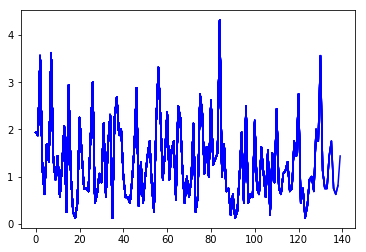

_____ random 1 2020-01-31 18:10:28.301473
episode: 0   score: 0.375 0.375   memory length: 0   epsilon: 1
episode: 1   score: 0.25 0.3125   memory length: 0   epsilon: 1
hit
hit
episode: 2   score: 3.1875 1.2708333333333333   memory length: 0   epsilon: 1
episode: 3   score: 0.625 1.109375   memory length: 0   epsilon: 1
episode: 4   score: 1.25 1.1375   memory length: 0   epsilon: 1
hit
episode: 5   score: 1.25 1.15625   memory length: 0   epsilon: 1
episode: 6   score: 1.0 1.1339285714285714   memory length: 0   epsilon: 1
episode: 7   score: 1.375 1.1640625   memory length: 0   epsilon: 1
hit
episode: 8   score: 1.125 1.1597222222222223   memory length: 0   epsilon: 1
episode: 9   score: 1.1875 1.1625   memory length: 0   epsilon: 1
episode: 10   score: 0.75 1.125   memory length: 0   epsilon: 1
hit
episode: 11   score: 2.6875 1.2552083333333333   memory length: 0   epsilon: 1
episode: 12   score: 0.4375 1.1923076923076923   memory length: 0   epsilon: 1
episode: 13   score: 0.125 1

hit
episode: 105   score: 1.6875 1.411556603773585   memory length: 0   epsilon: 1
episode: 106   score: 1.625 1.4135514018691588   memory length: 0   epsilon: 1
hit
episode: 107   score: 1.9375 1.4184027777777777   memory length: 0   epsilon: 1
hit
hit
episode: 108   score: 3.125 1.434059633027523   memory length: 0   epsilon: 1
hit
episode: 109   score: 1.9375 1.4386363636363637   memory length: 0   epsilon: 1
episode: 110   score: 0.875 1.4335585585585586   memory length: 0   epsilon: 1
episode: 111   score: 1.375 1.4330357142857142   memory length: 0   epsilon: 1
hit
episode: 112   score: 1.5625 1.4341814159292035   memory length: 0   epsilon: 1
hit
episode: 113   score: 1.375 1.4336622807017543   memory length: 0   epsilon: 1
hit
episode: 114   score: 1.625 1.4353260869565216   memory length: 0   epsilon: 1
episode: 115   score: 1.1875 1.4331896551724137   memory length: 0   epsilon: 1
episode: 116   score: 1.0 1.4294871794871795   memory length: 0   epsilon: 1
episode: 117   scor

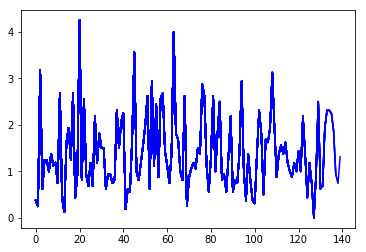

_____ random 2 2020-01-31 18:10:48.515074
episode: 0   score: 0.25 0.25   memory length: 0   epsilon: 1
hit
episode: 1   score: 1.625 0.9375   memory length: 0   epsilon: 1
hit
episode: 2   score: 1.625 1.1666666666666667   memory length: 0   epsilon: 1
episode: 3   score: 0.8125 1.078125   memory length: 0   epsilon: 1
episode: 4   score: 0.8125 1.025   memory length: 0   epsilon: 1
episode: 5   score: 1.1875 1.0520833333333333   memory length: 0   epsilon: 1
episode: 6   score: 0.4375 0.9642857142857143   memory length: 0   epsilon: 1
hit
episode: 7   score: 1.9375 1.0859375   memory length: 0   epsilon: 1
episode: 8   score: 1.375 1.1180555555555556   memory length: 0   epsilon: 1
episode: 9   score: 0.5625 1.0625   memory length: 0   epsilon: 1
hit
episode: 10   score: 1.9375 1.1420454545454546   memory length: 0   epsilon: 1
episode: 11   score: 0.8125 1.1145833333333333   memory length: 0   epsilon: 1
episode: 12   score: 0.8125 1.0913461538461537   memory length: 0   epsilon: 1


episode: 106   score: 1.1875 1.282126168224299   memory length: 0   epsilon: 1
hit
episode: 107   score: 1.875 1.2876157407407407   memory length: 0   epsilon: 1
episode: 108   score: 1.4375 1.2889908256880733   memory length: 0   epsilon: 1
episode: 109   score: 0.25 1.2795454545454545   memory length: 0   epsilon: 1
hit
episode: 110   score: 1.5 1.2815315315315314   memory length: 0   epsilon: 1
episode: 111   score: 0.625 1.2756696428571428   memory length: 0   epsilon: 1
episode: 112   score: 0.9375 1.2726769911504425   memory length: 0   epsilon: 1
episode: 113   score: 0.1875 1.263157894736842   memory length: 0   epsilon: 1
episode: 114   score: 0.125 1.2532608695652174   memory length: 0   epsilon: 1
episode: 115   score: 0.8125 1.2494612068965518   memory length: 0   epsilon: 1
episode: 116   score: 0.3125 1.2414529914529915   memory length: 0   epsilon: 1
episode: 117   score: 0.75 1.2372881355932204   memory length: 0   epsilon: 1
episode: 118   score: 1.875 1.24264705882352

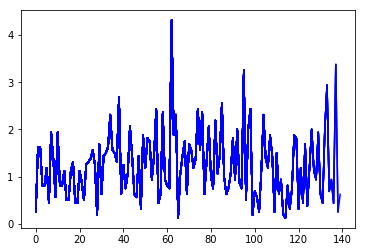

_____ a2c 0 2020-01-31 18:11:09.515968
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 175       
Total params: 487
Trainable params: 487
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_______________________________________________________________

episode: 91   score: 0.6875 0.389945652173913   memory length: 0   epsilon: 0
episode: 92   score: 0.1875 0.38776881720430106   memory length: 0   epsilon: 0
episode: 93   score: 0.1875 0.38563829787234044   memory length: 0   epsilon: 0
episode: 94   score: 0 0.3815789473684211   memory length: 0   epsilon: 0
hit
episode: 95   score: 1.25 0.390625   memory length: 0   epsilon: 0
hit
hit
episode: 96   score: 2.1875 0.40914948453608246   memory length: 0   epsilon: 0
episode: 97   score: 0.3125 0.40816326530612246   memory length: 0   epsilon: 0
episode: 98   score: 0.4375 0.40845959595959597   memory length: 0   epsilon: 0
episode: 99   score: 0 0.404375   memory length: 0   epsilon: 0
episode: 100   score: 0.6875 0.40717821782178215   memory length: 0   epsilon: 0
episode: 101   score: 0 0.40318627450980393   memory length: 0   epsilon: 0
episode: 102   score: 0.5 0.404126213592233   memory length: 0   epsilon: 0
episode: 103   score: 0.25 0.4026442307692308   memory length: 0   epsil

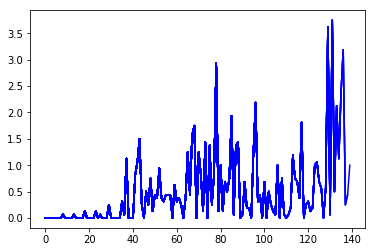

_____ a2c 1 2020-01-31 18:14:03.709274
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 175       
Total params: 487
Trainable params: 487
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 25        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_______________________________________________________________

hit
episode: 90   score: 2.875 1.1394230769230769   memory length: 0   epsilon: 0
episode: 91   score: 1.0 1.137907608695652   memory length: 0   epsilon: 0
episode: 92   score: 0.875 1.1350806451612903   memory length: 0   epsilon: 0
hit
episode: 93   score: 2.1875 1.1462765957446808   memory length: 0   epsilon: 0
hit
episode: 94   score: 1.75 1.1526315789473685   memory length: 0   epsilon: 0
episode: 95   score: 0.625 1.1471354166666667   memory length: 0   epsilon: 0
episode: 96   score: 0 1.1353092783505154   memory length: 0   epsilon: 0
episode: 97   score: 0.6875 1.1307397959183674   memory length: 0   epsilon: 0
episode: 98   score: 0.5625 1.125   memory length: 0   epsilon: 0
episode: 99   score: 1.125 1.125   memory length: 0   epsilon: 0
episode: 100   score: 0.625 1.120049504950495   memory length: 0   epsilon: 0
episode: 101   score: 0.6875 1.1158088235294117   memory length: 0   epsilon: 0
episode: 102   score: 0.5 1.1098300970873787   memory length: 0   epsilon: 0
epis

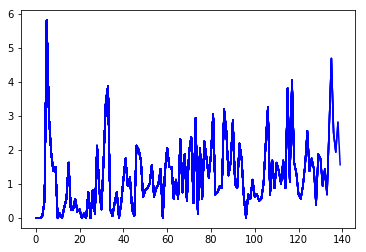

_____ a2c 2 2020-01-31 18:17:11.211168
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 175       
Total params: 487
Trainable params: 487
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 25        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_______________________________________________________________

hit
episode: 92   score: 1.125 0.37701612903225806   memory length: 0   epsilon: 0
hit
hit
episode: 93   score: 2.375 0.3982712765957447   memory length: 0   epsilon: 0
episode: 94   score: 0.8125 0.4026315789473684   memory length: 0   epsilon: 0
episode: 95   score: 0.25 0.4010416666666667   memory length: 0   epsilon: 0
episode: 96   score: 0.5 0.4020618556701031   memory length: 0   epsilon: 0
hit
hit
episode: 97   score: 2.125 0.41964285714285715   memory length: 0   epsilon: 0
episode: 98   score: 0.8125 0.4236111111111111   memory length: 0   epsilon: 0
hit
episode: 99   score: 1.875 0.438125   memory length: 0   epsilon: 0
hit
episode: 100   score: 2.3125 0.4566831683168317   memory length: 0   epsilon: 0
hit
episode: 101   score: 1.6875 0.46875   memory length: 0   epsilon: 0
episode: 102   score: 1.1875 0.47572815533980584   memory length: 0   epsilon: 0
hit
episode: 103   score: 1.3125 0.48377403846153844   memory length: 0   epsilon: 0
hit
episode: 104   score: 1.5 0.493452

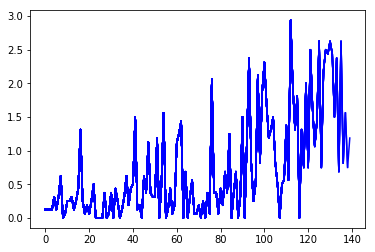

_____ ddqn 0 2020-01-31 18:20:20.685580
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_14 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_15 (Dense)             (None, 7)                 175       
Total params: 1,087
Trainable params: 1,087
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_17 (Dense)             (None, 24)                6

episode: 69   score: 0.0625 0.9821428571428571   memory length: 2000   epsilon: 0.17375873788196544
episode: 70   score: 0.0625 0.9691901408450704   memory length: 2000   epsilon: 0.16946840750804906
episode: 71   score: 0.1875 0.9583333333333334   memory length: 2000   epsilon: 0.16528401099933998
episode: 72   score: 0.0625 0.9460616438356164   memory length: 2000   epsilon: 0.16120293271023023
hit
episode: 73   score: 1.8125 0.9577702702702703   memory length: 2000   epsilon: 0.15722262157882166
episode: 74   score: 0.375 0.95   memory length: 2000   epsilon: 0.15334058953226876
episode: 75   score: 0.3125 0.9416118421052632   memory length: 2000   epsilon: 0.1495544099314969
episode: 76   score: 0.125 0.9310064935064936   memory length: 2000   epsilon: 0.14586171605432258
hit
episode: 77   score: 1.125 0.9334935897435898   memory length: 2000   epsilon: 0.14226019961602693
episode: 78   score: 0 0.9216772151898734   memory length: 2000   epsilon: 0.13874760932645758
episode: 79   s

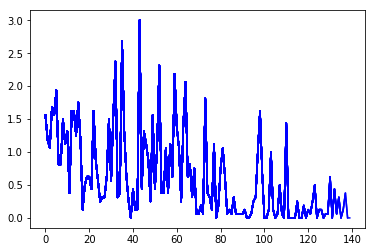

_____ ddqn 1 2020-01-31 18:24:18.719581
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_20 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_21 (Dense)             (None, 7)                 175       
Total params: 1,087
Trainable params: 1,087
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_23 (Dense)             (None, 24)                

hit
episode: 70   score: 1.3125 1.0492957746478873   memory length: 2000   epsilon: 0.16946840750804906
episode: 71   score: 0.25 1.0381944444444444   memory length: 2000   epsilon: 0.16528401099933998
hit
hit
episode: 72   score: 2.9375 1.0642123287671232   memory length: 2000   epsilon: 0.16120293271023023
episode: 73   score: 0.25 1.0532094594594594   memory length: 2000   epsilon: 0.15722262157882166
episode: 74   score: 0.9375 1.0516666666666667   memory length: 2000   epsilon: 0.15334058953226876
episode: 75   score: 0.5625 1.0452302631578947   memory length: 2000   epsilon: 0.1495544099314969
episode: 76   score: 1.0625 1.0454545454545454   memory length: 2000   epsilon: 0.14586171605432258
episode: 77   score: 0 1.0320512820512822   memory length: 2000   epsilon: 0.14226019961602693
hit
episode: 78   score: 1.3125 1.0356012658227849   memory length: 2000   epsilon: 0.13874760932645758
episode: 79   score: 0.3125 1.0265625   memory length: 2000   epsilon: 0.13532174948275888
epi

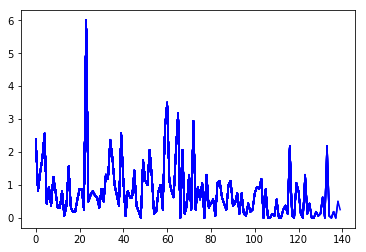

_____ ddqn 2 2020-01-31 18:28:22.852039
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_26 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_27 (Dense)             (None, 7)                 175       
Total params: 1,087
Trainable params: 1,087
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_29 (Dense)             (None, 24)               

episode: 69   score: 0.4375 0.9133928571428571   memory length: 2000   epsilon: 0.17375873788196544
episode: 70   score: 0.8125 0.9119718309859155   memory length: 2000   epsilon: 0.16946840750804906
hit
hit
episode: 71   score: 2.0625 0.9279513888888888   memory length: 2000   epsilon: 0.16528401099933998
episode: 72   score: 0 0.9152397260273972   memory length: 2000   epsilon: 0.16120293271023023
episode: 73   score: 0.1875 0.9054054054054054   memory length: 2000   epsilon: 0.15722262157882166
episode: 74   score: 0.5 0.9   memory length: 2000   epsilon: 0.15334058953226876
episode: 75   score: 0.3125 0.8922697368421053   memory length: 2000   epsilon: 0.1495544099314969
episode: 76   score: 0.375 0.885551948051948   memory length: 2000   epsilon: 0.14586171605432258
hit
episode: 77   score: 1.4375 0.8926282051282052   memory length: 2000   epsilon: 0.14226019961602693
episode: 78   score: 0.4375 0.8868670886075949   memory length: 2000   epsilon: 0.13874760932645758
episode: 79   

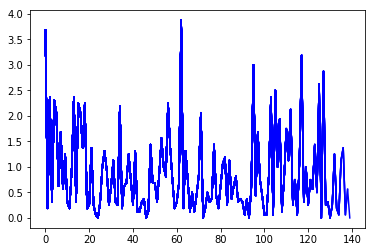

_____ sarsa 0 2020-01-31 18:32:41.769116
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 100)               1300      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_33 (De

Epoch 26/60
1000/1000 [==============================] - 0s 9us/step - loss: 2.3865
Epoch 27/60
1000/1000 [==============================] - 0s 9us/step - loss: 2.2827
Epoch 28/60
1000/1000 [==============================] - 0s 9us/step - loss: 2.0703
Epoch 29/60
1000/1000 [==============================] - 0s 9us/step - loss: 2.2290
Epoch 30/60
1000/1000 [==============================] - 0s 9us/step - loss: 2.0458
Epoch 31/60
1000/1000 [==============================] - 0s 9us/step - loss: 2.2262
Epoch 32/60
1000/1000 [==============================] - 0s 9us/step - loss: 2.0600
Epoch 33/60
1000/1000 [==============================] - 0s 9us/step - loss: 2.1722
Epoch 34/60
1000/1000 [==============================] - 0s 9us/step - loss: 2.1666
Epoch 35/60
1000/1000 [==============================] - 0s 9us/step - loss: 2.0984
Epoch 36/60
1000/1000 [==============================] - 0s 9us/step - loss: 2.0886
Epoch 37/60
1000/1000 [==============================] - 0s 9us/step - loss:

1000/1000 [==============================] - 0s 9us/step - loss: 1.6308
Epoch 4/60
1000/1000 [==============================] - 0s 9us/step - loss: 1.6342
Epoch 5/60
1000/1000 [==============================] - 0s 9us/step - loss: 1.6766
Epoch 6/60
1000/1000 [==============================] - 0s 9us/step - loss: 1.5782
Epoch 7/60
1000/1000 [==============================] - 0s 9us/step - loss: 1.7055
Epoch 8/60
1000/1000 [==============================] - 0s 9us/step - loss: 1.6408
Epoch 9/60
1000/1000 [==============================] - 0s 9us/step - loss: 1.4970
Epoch 10/60
1000/1000 [==============================] - 0s 10us/step - loss: 1.7084
Epoch 11/60
1000/1000 [==============================] - 0s 10us/step - loss: 1.5624
Epoch 12/60
1000/1000 [==============================] - 0s 9us/step - loss: 1.5629
Epoch 13/60
1000/1000 [==============================] - 0s 10us/step - loss: 1.5091
Epoch 14/60
1000/1000 [==============================] - 0s 10us/step - loss: 1.4672
Epoch 

Epoch 1/2
500/500 [==============================] - 0s 24us/step - loss: 1.4162
Epoch 2/2
500/500 [==============================] - 0s 24us/step - loss: 1.4875
Epoch 1/2
500/500 [==============================] - 0s 22us/step - loss: 1.0157
Epoch 2/2
500/500 [==============================] - 0s 26us/step - loss: 1.0120
delta_r 0.44398595703055244 r 0.462313263671576
Epoch 1/2
500/500 [==============================] - 0s 14us/step - loss: 1.3736
Epoch 2/2
500/500 [==============================] - 0s 14us/step - loss: 1.4403
Epoch 1/2
500/500 [==============================] - 0s 13us/step - loss: 0.9629
Epoch 2/2
500/500 [==============================] - 0s 14us/step - loss: 0.8886
delta_r 0.42922561158209566 r 0.44910323093699556
Epoch 1/2
500/500 [==============================] - 0s 19us/step - loss: 1.5563
Epoch 2/2
500/500 [==============================] - 0s 17us/step - loss: 1.4644
Epoch 1/2
500/500 [==============================] - 0s 15us/step - loss: 1.0120
Epoch 2/2
5

Epoch 2/2
500/500 [==============================] - 0s 14us/step - loss: 1.1723
Epoch 1/2
500/500 [==============================] - 0s 13us/step - loss: 0.7462
Epoch 2/2
500/500 [==============================] - 0s 13us/step - loss: 0.6859
delta_r 0.37718035403322464 r 0.44416392447289216
Epoch 1/2
500/500 [==============================] - 0s 14us/step - loss: 1.1337
Epoch 2/2
500/500 [==============================] - 0s 12us/step - loss: 1.1002
Epoch 1/2
500/500 [==============================] - 0s 15us/step - loss: 0.7428
Epoch 2/2
500/500 [==============================] - 0s 15us/step - loss: 0.7077
delta_r 0.37626043981938867 r 0.4699852324450205
Epoch 1/2
500/500 [==============================] - 0s 14us/step - loss: 1.2352
Epoch 2/2
500/500 [==============================] - 0s 13us/step - loss: 1.2002
Epoch 1/2
500/500 [==============================] - 0s 13us/step - loss: 0.7127
Epoch 2/2
500/500 [==============================] - 0s 11us/step - loss: 0.6647
delta_r 0.

Epoch 2/2
500/500 [==============================] - 0s 14us/step - loss: 1.0279
Epoch 1/2
500/500 [==============================] - 0s 13us/step - loss: 0.6118
Epoch 2/2
500/500 [==============================] - 0s 13us/step - loss: 0.5768
delta_r 0.35861503191416777 r 0.46661452470578
Epoch 1/2
500/500 [==============================] - 0s 14us/step - loss: 1.0087
Epoch 2/2
500/500 [==============================] - 0s 13us/step - loss: 1.0170
Epoch 1/2
500/500 [==============================] - 0s 14us/step - loss: 0.5798
Epoch 2/2
500/500 [==============================] - 0s 13us/step - loss: 0.5547
delta_r 0.35186739856270993 r 0.4465716755673782
Epoch 1/2
500/500 [==============================] - 0s 13us/step - loss: 1.0344
Epoch 2/2
500/500 [==============================] - 0s 12us/step - loss: 0.9256
Epoch 1/2
500/500 [==============================] - 0s 14us/step - loss: 0.5529
Epoch 2/2
500/500 [==============================] - 0s 13us/step - loss: 0.5829
delta_r 0.360

Epoch 1/1
6000/6000 [==============================] - 0s 5us/step - loss: 0.1490
Epoch 1/1
6000/6000 [==============================] - 0s 5us/step - loss: 0.0977
delta_r 0.3284652312052583 r 0.4866714282876949
episode: 24   score: 1.625 1.4525   memory length: 6250   epsilon: 0.5352447007455633
hit
Epoch 1/1
6000/6000 [==============================] - 0s 6us/step - loss: 0.1609
Epoch 1/1
6000/6000 [==============================] - 0s 5us/step - loss: 0.1079
delta_r 0.3487734360255634 r 0.5136400697470446
episode: 25   score: 1.8125 1.4663461538461537   memory length: 6500   epsilon: 0.5220288094178624
Epoch 1/1
6000/6000 [==============================] - 0s 5us/step - loss: 0.1505
Epoch 1/1
6000/6000 [==============================] - 0s 5us/step - loss: 0.0981
delta_r 0.3313085150196547 r 0.5049383588472532
episode: 26   score: 0.375 1.4259259259259258   memory length: 6750   epsilon: 0.5091392357227179
hit
Epoch 1/1
6000/6000 [==============================] - 0s 5us/step - loss

6000/6000 [==============================] - 0s 5us/step - loss: 0.1483
delta_r 0.40436913655351714 r 0.5827412272733218
episode: 51   score: 2.0625 1.5733173076923077   memory length: 10000   epsilon: 0.27251407786223053
Epoch 1/1
6000/6000 [==============================] - 0s 5us/step - loss: 0.2183
Epoch 1/1
6000/6000 [==============================] - 0s 5us/step - loss: 0.1503
delta_r 0.3998440635312654 r 0.5757605296267684
episode: 52   score: 1.875 1.5790094339622642   memory length: 10000   epsilon: 0.2657853490522501
hit
hit
Epoch 1/1
6000/6000 [==============================] - 0s 5us/step - loss: 0.2226
Epoch 1/1
6000/6000 [==============================] - 0s 5us/step - loss: 0.1538
delta_r 0.4070956333830158 r 0.5796617232644191
episode: 53   score: 2.6875 1.599537037037037   memory length: 10000   epsilon: 0.2592227613523128
Epoch 1/1
6000/6000 [==============================] - 0s 5us/step - loss: 0.2248
Epoch 1/1
6000/6000 [==============================] - 0s 5us/step

6000/6000 [==============================] - 0s 5us/step - loss: 0.1746
delta_r 0.43731177048053366 r 0.6078621920616963
episode: 77   score: 1.25 1.5600961538461537   memory length: 10000   epsilon: 0.14226019961602693
Epoch 1/1
6000/6000 [==============================] - 0s 5us/step - loss: 0.2633
Epoch 1/1
6000/6000 [==============================] - 0s 5us/step - loss: 0.1823
delta_r 0.4508109140598303 r 0.6245239504800343
episode: 78   score: 0.4375 1.5458860759493671   memory length: 10000   epsilon: 0.13874760932645758
hit
hit
Epoch 1/1
6000/6000 [==============================] - 0s 5us/step - loss: 0.2601
Epoch 1/1
6000/6000 [==============================] - 0s 4us/step - loss: 0.1784
delta_r 0.44305082340824126 r 0.6172853677027702
episode: 79   score: 2.625 1.559375   memory length: 10000   epsilon: 0.13532174948275888
Epoch 1/1
6000/6000 [==============================] - 0s 5us/step - loss: 0.2679
Epoch 1/1
6000/6000 [==============================] - 0s 5us/step - loss:

hit
Epoch 1/1
6000/6000 [==============================] - 0s 5us/step - loss: 0.1943
Epoch 1/1
6000/6000 [==============================] - 0s 4us/step - loss: 0.1341
delta_r 0.38541024117866185 r 0.5426833520107323
episode: 104   score: 1 1.3988095238095237   memory length: 10000   epsilon: 0.07243024930626545
Epoch 1/1
6000/6000 [==============================] - 0s 4us/step - loss: 0.1929
Epoch 1/1
6000/6000 [==============================] - 0s 4us/step - loss: 0.1292
delta_r 0.3787829250694955 r 0.5390312663525715
episode: 105   score: 0.5625 1.3909198113207548   memory length: 10000   epsilon: 0.07064185177082695
hit
Epoch 1/1
6000/6000 [==============================] - 0s 5us/step - loss: 0.1762
Epoch 1/1
6000/6000 [==============================] - 0s 4us/step - loss: 0.1214
delta_r 0.3658105105008829 r 0.5165348756692788
episode: 106   score: 1.875 1.3954439252336448   memory length: 10000   epsilon: 0.06889761210831305
Epoch 1/1
6000/6000 [==============================] - 

6000/6000 [==============================] - 0s 6us/step - loss: 0.1716
Epoch 1/1
6000/6000 [==============================] - 0s 5us/step - loss: 0.1198
delta_r 0.36067675058170007 r 0.5375055315249436
episode: 130   score: 0.5 1.3463740458015268   memory length: 10000   epsilon: 0.03781067681118871
Epoch 1/1
6000/6000 [==============================] - 0s 6us/step - loss: 0.1747
Epoch 1/1
6000/6000 [==============================] - 0s 6us/step - loss: 0.1122
delta_r 0.3519250601001121 r 0.5323111403714114
episode: 131   score: 0.5 1.339962121212121   memory length: 10000   epsilon: 0.036877081774997926
hit
Epoch 1/1
6000/6000 [==============================] - 0s 5us/step - loss: 0.1722
Epoch 1/1
6000/6000 [==============================] - 0s 6us/step - loss: 0.1139
delta_r 0.3612363746998903 r 0.5491921606643987
episode: 132   score: 1.3125 1.3397556390977443   memory length: 10000   epsilon: 0.03596653842063641
Epoch 1/1
6000/6000 [==============================] - 0s 5us/step - 

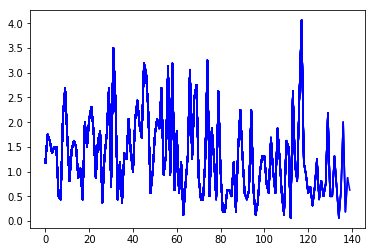

_____ sarsa 1 2020-01-31 22:07:05.232010
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 100)               1300      
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)               400       
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_6 (Batch (None, 100)               400       
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_39 (De

1000/1000 [==============================] - 0s 11us/step - loss: 3.4124
Epoch 26/60
1000/1000 [==============================] - 0s 10us/step - loss: 3.0540
Epoch 27/60
1000/1000 [==============================] - 0s 9us/step - loss: 3.0832
Epoch 28/60
1000/1000 [==============================] - 0s 8us/step - loss: 3.2693
Epoch 29/60
1000/1000 [==============================] - 0s 8us/step - loss: 2.9436
Epoch 30/60
1000/1000 [==============================] - 0s 9us/step - loss: 3.0891
Epoch 31/60
1000/1000 [==============================] - 0s 8us/step - loss: 3.1830
Epoch 32/60
1000/1000 [==============================] - 0s 9us/step - loss: 3.2955
Epoch 33/60
1000/1000 [==============================] - 0s 9us/step - loss: 3.2713
Epoch 34/60
1000/1000 [==============================] - 0s 9us/step - loss: 2.9281
Epoch 35/60
1000/1000 [==============================] - 0s 9us/step - loss: 2.8276
Epoch 36/60
1000/1000 [==============================] - 0s 9us/step - loss: 3.0023
Ep

Epoch 3/60
1000/1000 [==============================] - 0s 10us/step - loss: 3.7002
Epoch 4/60
1000/1000 [==============================] - 0s 10us/step - loss: 3.5909
Epoch 5/60
1000/1000 [==============================] - 0s 11us/step - loss: 3.4613
Epoch 6/60
1000/1000 [==============================] - 0s 10us/step - loss: 2.9464
Epoch 7/60
1000/1000 [==============================] - 0s 10us/step - loss: 3.2408
Epoch 8/60
1000/1000 [==============================] - 0s 11us/step - loss: 3.3108
Epoch 9/60
1000/1000 [==============================] - 0s 10us/step - loss: 2.9646
Epoch 10/60
1000/1000 [==============================] - 0s 12us/step - loss: 2.7543
Epoch 11/60
1000/1000 [==============================] - 0s 11us/step - loss: 2.4517
Epoch 12/60
1000/1000 [==============================] - 0s 10us/step - loss: 2.5219
Epoch 13/60
1000/1000 [==============================] - 0s 10us/step - loss: 2.7119
Epoch 14/60
1000/1000 [==============================] - 0s 10us/step - 

Epoch 40/60
1000/1000 [==============================] - 0s 11us/step - loss: 1.2366
Epoch 41/60
1000/1000 [==============================] - 0s 11us/step - loss: 1.1995
Epoch 42/60
1000/1000 [==============================] - 0s 12us/step - loss: 1.1789
Epoch 43/60
1000/1000 [==============================] - 0s 11us/step - loss: 1.2141
Epoch 44/60
1000/1000 [==============================] - 0s 11us/step - loss: 1.1544
Epoch 45/60
1000/1000 [==============================] - 0s 11us/step - loss: 1.1511
Epoch 46/60
1000/1000 [==============================] - 0s 10us/step - loss: 1.0556
Epoch 47/60
1000/1000 [==============================] - 0s 10us/step - loss: 1.1806
Epoch 48/60
1000/1000 [==============================] - 0s 10us/step - loss: 1.1028
Epoch 49/60
1000/1000 [==============================] - 0s 10us/step - loss: 1.1962
Epoch 50/60
1000/1000 [==============================] - 0s 10us/step - loss: 1.1791
Epoch 51/60
1000/1000 [==============================] - 0s 10us/

Epoch 18/60
1000/1000 [==============================] - 0s 11us/step - loss: 0.7699
Epoch 19/60
1000/1000 [==============================] - 0s 11us/step - loss: 0.7384
Epoch 20/60
1000/1000 [==============================] - 0s 10us/step - loss: 0.7290
Epoch 21/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.7541
Epoch 22/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.7434
Epoch 23/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.7407
Epoch 24/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.7617
Epoch 25/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.7839
Epoch 26/60
1000/1000 [==============================] - 0s 10us/step - loss: 0.7564
Epoch 27/60
1000/1000 [==============================] - 0s 10us/step - loss: 0.7268
Epoch 28/60
1000/1000 [==============================] - 0s 10us/step - loss: 0.7144
Epoch 29/60
1000/1000 [==============================] - 0s 10us/step 

Epoch 55/60
1000/1000 [==============================] - 0s 10us/step - loss: 0.6215
Epoch 56/60
1000/1000 [==============================] - 0s 10us/step - loss: 0.6231
Epoch 57/60
1000/1000 [==============================] - 0s 10us/step - loss: 0.6216
Epoch 58/60
1000/1000 [==============================] - 0s 10us/step - loss: 0.6114
Epoch 59/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.6088
Epoch 60/60
1000/1000 [==============================] - 0s 10us/step - loss: 0.5821
Epoch 1/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.5720
Epoch 2/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.6091
Epoch 3/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.6085
Epoch 4/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.5946
Epoch 5/60
1000/1000 [==============================] - 0s 10us/step - loss: 0.5954
Epoch 6/60
1000/1000 [==============================] - 0s 9us/step - loss:

1000/1000 [==============================] - 0s 9us/step - loss: 0.5283
Epoch 33/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.5347
Epoch 34/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.5380
Epoch 35/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.5253
Epoch 36/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.5289
Epoch 37/60
1000/1000 [==============================] - 0s 11us/step - loss: 0.5291
Epoch 38/60
1000/1000 [==============================] - 0s 10us/step - loss: 0.5342
Epoch 39/60
1000/1000 [==============================] - 0s 10us/step - loss: 0.5191
Epoch 40/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.5151
Epoch 41/60
1000/1000 [==============================] - 0s 11us/step - loss: 0.5270
Epoch 42/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.5304
Epoch 43/60
1000/1000 [==============================] - 0s 10us/step - loss: 0.5229

Epoch 9/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.4813
Epoch 10/60
1000/1000 [==============================] - 0s 8us/step - loss: 0.4929
Epoch 11/60
1000/1000 [==============================] - 0s 8us/step - loss: 0.4826
Epoch 12/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.4825
Epoch 13/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.4824
Epoch 14/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.4917
Epoch 15/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.4832
Epoch 16/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.4787
Epoch 17/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.4758
Epoch 18/60
1000/1000 [==============================] - 0s 8us/step - loss: 0.4942
Epoch 19/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.4900
Epoch 20/60
1000/1000 [==============================] - 0s 8us/step - loss: 

Epoch 47/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.4438
Epoch 48/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.4562
Epoch 49/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.4482
Epoch 50/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.4443
Epoch 51/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.4416
Epoch 52/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.4474
Epoch 53/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.4626
Epoch 54/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.4550
Epoch 55/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.4505
Epoch 56/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.4568
Epoch 57/60
1000/1000 [==============================] - 0s 9us/step - loss: 0.4470
Epoch 58/60
1000/1000 [==============================] - 0s 9us/step - loss:

Epoch 2/2
500/500 [==============================] - 0s 17us/step - loss: 0.4506
Epoch 1/2
500/500 [==============================] - 0s 13us/step - loss: 0.4607
Epoch 2/2
500/500 [==============================] - 0s 14us/step - loss: 0.4341
Epoch 1/2
500/500 [==============================] - 0s 13us/step - loss: 0.4375
Epoch 2/2
500/500 [==============================] - 0s 12us/step - loss: 0.4627
delta_r 0.5230052186059695 r 0.6684199075268273
Epoch 1/2
500/500 [==============================] - 0s 13us/step - loss: 1.5626
Epoch 2/2
500/500 [==============================] - 0s 11us/step - loss: 1.5017
Epoch 1/2
500/500 [==============================] - 0s 13us/step - loss: 0.4472
Epoch 2/2
500/500 [==============================] - 0s 13us/step - loss: 0.4549
Epoch 1/2
500/500 [==============================] - 0s 12us/step - loss: 0.4340
Epoch 2/2
500/500 [==============================] - 0s 12us/step - loss: 0.4600
Epoch 1/2
500/500 [==============================] - 0s 14us/

Epoch 1/2
500/500 [==============================] - 0s 13us/step - loss: 0.4593
Epoch 2/2
500/500 [==============================] - 0s 13us/step - loss: 0.4590
Epoch 1/2
500/500 [==============================] - 0s 15us/step - loss: 0.4484
Epoch 2/2
500/500 [==============================] - 0s 17us/step - loss: 0.4526
Epoch 1/2
500/500 [==============================] - 0s 16us/step - loss: 0.4415
Epoch 2/2
500/500 [==============================] - 0s 14us/step - loss: 0.4397
Epoch 1/2
500/500 [==============================] - 0s 14us/step - loss: 0.4433
Epoch 2/2
500/500 [==============================] - 0s 14us/step - loss: 0.4460
Epoch 1/2
500/500 [==============================] - 0s 13us/step - loss: 0.4372
Epoch 2/2
500/500 [==============================] - 0s 14us/step - loss: 0.4344
Epoch 1/2
500/500 [==============================] - 0s 14us/step - loss: 0.4470
Epoch 2/2
500/500 [==============================] - 0s 14us/step - loss: 0.4426
Epoch 1/2
500/500 [=========

Epoch 2/2
500/500 [==============================] - 0s 11us/step - loss: 0.3952
Epoch 1/2
500/500 [==============================] - 0s 11us/step - loss: 0.3943
Epoch 2/2
500/500 [==============================] - 0s 12us/step - loss: 0.3975
Epoch 1/2
500/500 [==============================] - 0s 12us/step - loss: 0.3907
Epoch 2/2
500/500 [==============================] - 0s 12us/step - loss: 0.3912
delta_r 0.5231270842354673 r 0.6450883570466318
Epoch 1/2
500/500 [==============================] - 0s 13us/step - loss: 1.4479
Epoch 2/2
500/500 [==============================] - 0s 12us/step - loss: 1.4103
Epoch 1/2
500/500 [==============================] - 0s 14us/step - loss: 0.4316
Epoch 2/2
500/500 [==============================] - 0s 13us/step - loss: 0.4375
Epoch 1/2
500/500 [==============================] - 0s 12us/step - loss: 0.4365
Epoch 2/2
500/500 [==============================] - 0s 11us/step - loss: 0.4269
Epoch 1/2
500/500 [==============================] - 0s 11us/

Epoch 1/2
500/500 [==============================] - 0s 12us/step - loss: 0.4175
Epoch 2/2
500/500 [==============================] - 0s 12us/step - loss: 0.4220
Epoch 1/2
500/500 [==============================] - 0s 13us/step - loss: 0.4165
Epoch 2/2
500/500 [==============================] - 0s 12us/step - loss: 0.4078
Epoch 1/2
500/500 [==============================] - 0s 12us/step - loss: 0.4252
Epoch 2/2
500/500 [==============================] - 0s 11us/step - loss: 0.4112
Epoch 1/2
500/500 [==============================] - 0s 13us/step - loss: 0.4180
Epoch 2/2
500/500 [==============================] - 0s 11us/step - loss: 0.4135
Epoch 1/2
500/500 [==============================] - 0s 12us/step - loss: 0.4144
Epoch 2/2
500/500 [==============================] - 0s 12us/step - loss: 0.4085
Epoch 1/2
500/500 [==============================] - 0s 13us/step - loss: 0.4089
Epoch 2/2
500/500 [==============================] - 0s 11us/step - loss: 0.3969
Epoch 1/2
500/500 [=========

Epoch 2/2
500/500 [==============================] - 0s 14us/step - loss: 0.3730
Epoch 1/2
500/500 [==============================] - 0s 14us/step - loss: 0.3766
Epoch 2/2
500/500 [==============================] - 0s 13us/step - loss: 0.3812
Epoch 1/2
500/500 [==============================] - 0s 13us/step - loss: 0.3625
Epoch 2/2
500/500 [==============================] - 0s 13us/step - loss: 0.3793
delta_r 0.5425485555834839 r 0.6810829163765763
Epoch 1/2
500/500 [==============================] - 0s 16us/step - loss: 1.4486
Epoch 2/2
500/500 [==============================] - 0s 16us/step - loss: 1.1692
Epoch 1/2
500/500 [==============================] - 0s 14us/step - loss: 0.3675
Epoch 2/2
500/500 [==============================] - 0s 14us/step - loss: 0.3805
Epoch 1/2
500/500 [==============================] - 0s 14us/step - loss: 0.3713
Epoch 2/2
500/500 [==============================] - 0s 15us/step - loss: 0.3552
Epoch 1/2
500/500 [==============================] - 0s 17us/

Epoch 2/2
500/500 [==============================] - 0s 13us/step - loss: 1.1714
Epoch 1/2
500/500 [==============================] - 0s 14us/step - loss: 0.3233
Epoch 2/2
500/500 [==============================] - 0s 15us/step - loss: 0.3111
delta_r 0.4814952476919799 r 0.6651949698207044
Epoch 1/2
500/500 [==============================] - 0s 14us/step - loss: 1.2818
Epoch 2/2
500/500 [==============================] - 0s 13us/step - loss: 1.2712
Epoch 1/2
500/500 [==============================] - 0s 19us/step - loss: 0.3634
Epoch 2/2
500/500 [==============================] - 0s 24us/step - loss: 0.3605
Epoch 1/2
500/500 [==============================] - 0s 15us/step - loss: 0.3434
Epoch 2/2
500/500 [==============================] - 0s 14us/step - loss: 0.3448
Epoch 1/2
500/500 [==============================] - 0s 14us/step - loss: 0.3560
Epoch 2/2
500/500 [==============================] - 0s 14us/step - loss: 0.3602
delta_r 0.5391053288661125 r 0.6780100139484965
Epoch 1/2
500

Epoch 1/2
500/500 [==============================] - 0s 12us/step - loss: 0.3363
Epoch 2/2
500/500 [==============================] - 0s 12us/step - loss: 0.3239
Epoch 1/2
500/500 [==============================] - 0s 12us/step - loss: 0.3322
Epoch 2/2
500/500 [==============================] - 0s 12us/step - loss: 0.3263
Epoch 1/2
500/500 [==============================] - 0s 12us/step - loss: 0.3301
Epoch 2/2
500/500 [==============================] - 0s 12us/step - loss: 0.3118
delta_r 0.5085985579505395 r 0.6722457418258457
Epoch 1/2
500/500 [==============================] - 0s 18us/step - loss: 1.2851
Epoch 2/2
500/500 [==============================] - 0s 16us/step - loss: 1.1487
Epoch 1/2
500/500 [==============================] - 0s 16us/step - loss: 0.3513
Epoch 2/2
500/500 [==============================] - 0s 15us/step - loss: 0.3579
Epoch 1/2
500/500 [==============================] - 0s 14us/step - loss: 0.3491
Epoch 2/2
500/500 [==============================] - 0s 14us/

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 765.4686
Epoch 2/2
500/500 [==============================] - 0s 28us/step - loss: 797.9925
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 752.3776
Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 788.3046
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 812.1301
Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 795.7830
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 775.3389
Epoch 2/2
500/500 [==============================] - 0s 28us/step - loss: 730.2178
Epoch 1/2
500/500 [==============================] - 0s 43us/step - loss: 753.4500
Epoch 2/2
500/500 [==============================] - 0s 29us/step - loss: 729.5289
Epoch 1/2
500/500 [==============================] - 0s 30us/step - loss: 729.1404
Epoch 2/2
500/500 [==============================] - 0s 62us/step - loss: 710.0934
Epoc

Epoch 2/2
500/500 [==============================] - 0s 28us/step - loss: 777.0182
Epoch 1/2
500/500 [==============================] - 0s 27us/step - loss: 766.2836
Epoch 2/2
500/500 [==============================] - 0s 28us/step - loss: 752.5009
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 777.2262
Epoch 2/2
500/500 [==============================] - 0s 30us/step - loss: 781.2852
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 754.5392
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 732.3734
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 710.6295
Epoch 2/2
500/500 [==============================] - 0s 26us/step - loss: 742.6122
Epoch 1/2
500/500 [==============================] - 0s 24us/step - loss: 739.3843
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 760.9713
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 761.8787
Epoc

Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 763.2706
self-test 4.174820832156291
hit
Epoch 1/1
1250/1250 [==============================] - 0s 15us/step - loss: 728.6854
self-test 3.2718065595998205
episode: 4   score: 2.1875 1.725   memory length: 1250   epsilon: 0.8824913866284702
hit
Epoch 1/1
1500/1500 [==============================] - 0s 17us/step - loss: 609.6678
self-test 2.772860118768596
episode: 5   score: 1.4375 1.6770833333333333   memory length: 1500   epsilon: 0.8607015207090729
hit
Epoch 1/1
1750/1750 [==============================] - 0s 15us/step - loss: 631.9938
self-test 2.395031251040174
episode: 6   score: 1.25 1.6160714285714286   memory length: 1750   epsilon: 0.8394496750627115
hit
Epoch 1/1
2000/2000 [==============================] - 0s 14us/step - loss: 549.1769
self-test 2.1704778983083384
episode: 7   score: 1.9375 1.65625   memory length: 2000   epsilon: 0.8187225652655491
Epoch 1/1
2250/2250 [==============================] 

6000/6000 [==============================] - 0s 13us/step - loss: 619.8434
self-test 1.9167955867954576
episode: 42   score: 0.125 1.4825581395348837   memory length: 7000   epsilon: 0.3412794098166824
Epoch 1/1
6000/6000 [==============================] - 0s 13us/step - loss: 596.8118
self-test 1.9229458927955179
episode: 43   score: 2.0 1.4943181818181819   memory length: 7000   epsilon: 0.33285277507142214
hit
Epoch 1/1
6000/6000 [==============================] - 0s 12us/step - loss: 593.2129
self-test 1.8189329394135456
episode: 44   score: 1.6875 1.4986111111111111   memory length: 7000   epsilon: 0.32463420495323136
Epoch 1/1
6000/6000 [==============================] - 0s 13us/step - loss: 580.9135
self-test 1.9435558904527714
episode: 45   score: 1.4375 1.497282608695652   memory length: 7000   epsilon: 0.3166185620744876
Epoch 1/1
6000/6000 [==============================] - 0s 12us/step - loss: 611.5896
self-test 2.026316224251317
episode: 46   score: 0.0625 1.46675531914893

Epoch 1/1
6000/6000 [==============================] - 0s 17us/step - loss: 497.1478
self-test 1.8909291359443003
episode: 81   score: 0.8125 1.4032012195121952   memory length: 7000   epsilon: 0.12872170805678726
Epoch 1/1
6000/6000 [==============================] - 0s 24us/step - loss: 509.6529
self-test 1.8574041926055223
episode: 82   score: 0.625 1.3938253012048192   memory length: 7000   epsilon: 0.1255434008211908
hit
Epoch 1/1
6000/6000 [==============================] - 0s 14us/step - loss: 470.2144
self-test 1.7660496412252082
episode: 83   score: 2.1875 1.4032738095238095   memory length: 7000   epsilon: 0.12244357014589088
Epoch 1/1
6000/6000 [==============================] - 0s 13us/step - loss: 465.7496
self-test 1.6618952445258794
episode: 84   score: 0.875 1.3970588235294117   memory length: 7000   epsilon: 0.11942027834203038
Epoch 1/1
6000/6000 [==============================] - 0s 11us/step - loss: 470.4016
self-test 1.7890628466583613
episode: 85   score: 1.0 1.39

6000/6000 [==============================] - 0s 22us/step - loss: 565.6349
self-test 1.8887930746745014
episode: 119   score: 1.5 1.3479166666666667   memory length: 7000   epsilon: 0.0497796003698677
Epoch 1/1
6000/6000 [==============================] - 0s 29us/step - loss: 507.1932
self-test 1.6245006531375943
episode: 120   score: 0.75 1.3429752066115703   memory length: 7000   epsilon: 0.04855047696536104
Epoch 1/1
6000/6000 [==============================] - 0s 16us/step - loss: 531.0434
self-test 1.77198413004189
episode: 121   score: 0.625 1.3370901639344261   memory length: 7000   epsilon: 0.04735170222440894
Epoch 1/1
6000/6000 [==============================] - 0s 24us/step - loss: 552.6314
self-test 1.8274474573305788
episode: 122   score: 1.125 1.3353658536585367   memory length: 7000   epsilon: 0.04618252679883683
hit
Epoch 1/1
6000/6000 [==============================] - 0s 23us/step - loss: 538.0445
self-test 1.8420360722980447
episode: 123   score: 2.125 1.341733870967

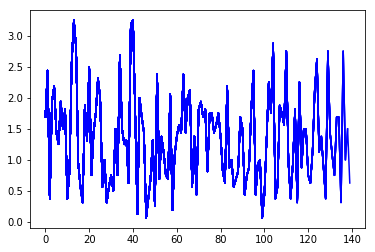

_____ mb 1 2020-02-02 00:39:46.272140
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 260)               5200      
_________________________________________________________________
batch_normalization_16 (Batc (None, 260)               1040      
_________________________________________________________________
dropout_16 (Dropout)         (None, 260)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 260)               67860     
_________________________________________________________________
batch_normalization_17 (Batc (None, 260)               1040      
_________________________________________________________________
dropout_17 (Dropout)         (None, 260)               0         
_________________________________________________________________
dense_55 (Dense

Epoch 52/60
1000/1000 [==============================] - 0s 30us/step - loss: 12295.8838
Epoch 53/60
1000/1000 [==============================] - 0s 31us/step - loss: 12261.1416
Epoch 54/60
1000/1000 [==============================] - 0s 32us/step - loss: 12265.8076
Epoch 55/60
1000/1000 [==============================] - 0s 29us/step - loss: 12235.5342
Epoch 56/60
1000/1000 [==============================] - 0s 31us/step - loss: 12224.5625
Epoch 57/60
1000/1000 [==============================] - 0s 28us/step - loss: 12207.3281
Epoch 58/60
1000/1000 [==============================] - 0s 30us/step - loss: 12180.3174
Epoch 59/60
1000/1000 [==============================] - 0s 30us/step - loss: 12174.5283
Epoch 60/60
1000/1000 [==============================] - 0s 31us/step - loss: 12155.6338
Epoch 1/60
1000/1000 [==============================] - 0s 26us/step - loss: 12155.3232
Epoch 2/60
1000/1000 [==============================] - 0s 29us/step - loss: 12111.0127
Epoch 3/60
1000/1000 [=

Epoch 25/60
1000/1000 [==============================] - 0s 25us/step - loss: 10510.6025
Epoch 26/60
1000/1000 [==============================] - 0s 27us/step - loss: 10489.1025
Epoch 27/60
1000/1000 [==============================] - 0s 25us/step - loss: 10458.8564
Epoch 28/60
1000/1000 [==============================] - 0s 25us/step - loss: 10435.2842
Epoch 29/60
1000/1000 [==============================] - 0s 26us/step - loss: 10415.5156
Epoch 30/60
1000/1000 [==============================] - 0s 27us/step - loss: 10390.7061
Epoch 31/60
1000/1000 [==============================] - 0s 26us/step - loss: 10380.2051
Epoch 32/60
1000/1000 [==============================] - 0s 25us/step - loss: 10352.2842
Epoch 33/60
1000/1000 [==============================] - 0s 26us/step - loss: 10356.3516
Epoch 34/60
1000/1000 [==============================] - 0s 47us/step - loss: 10306.0127
Epoch 35/60
1000/1000 [==============================] - 0s 28us/step - loss: 10311.5234
Epoch 36/60
1000/1000

Epoch 58/60
1000/1000 [==============================] - 0s 32us/step - loss: 8374.5791
Epoch 59/60
1000/1000 [==============================] - 0s 33us/step - loss: 8310.2598
Epoch 60/60
1000/1000 [==============================] - 0s 33us/step - loss: 8304.9229
Epoch 1/60
1000/1000 [==============================] - 0s 27us/step - loss: 8278.7471
Epoch 2/60
1000/1000 [==============================] - 0s 26us/step - loss: 8276.8945
Epoch 3/60
1000/1000 [==============================] - 0s 27us/step - loss: 8214.5576
Epoch 4/60
1000/1000 [==============================] - 0s 27us/step - loss: 8203.6875
Epoch 5/60
1000/1000 [==============================] - 0s 27us/step - loss: 8166.1367
Epoch 6/60
1000/1000 [==============================] - 0s 27us/step - loss: 8162.0640
Epoch 7/60
1000/1000 [==============================] - 0s 27us/step - loss: 8150.9111
Epoch 8/60
1000/1000 [==============================] - 0s 29us/step - loss: 8054.4380
Epoch 9/60
1000/1000 [==================

Epoch 32/60
1000/1000 [==============================] - 0s 27us/step - loss: 6252.2725
Epoch 33/60
1000/1000 [==============================] - 0s 27us/step - loss: 6236.8989
Epoch 34/60
1000/1000 [==============================] - 0s 28us/step - loss: 6195.5571
Epoch 35/60
1000/1000 [==============================] - 0s 26us/step - loss: 6200.2788
Epoch 36/60
1000/1000 [==============================] - 0s 27us/step - loss: 6147.8037
Epoch 37/60
1000/1000 [==============================] - 0s 29us/step - loss: 6159.9058
Epoch 38/60
1000/1000 [==============================] - 0s 25us/step - loss: 6115.8379
Epoch 39/60
1000/1000 [==============================] - 0s 26us/step - loss: 6078.7549
Epoch 40/60
1000/1000 [==============================] - 0s 29us/step - loss: 6106.4194
Epoch 41/60
1000/1000 [==============================] - 0s 26us/step - loss: 6051.9165
Epoch 42/60
1000/1000 [==============================] - 0s 25us/step - loss: 6025.2168
Epoch 43/60
1000/1000 [=========

Epoch 6/60
1000/1000 [==============================] - 0s 25us/step - loss: 4493.3545
Epoch 7/60
1000/1000 [==============================] - 0s 24us/step - loss: 4486.2593
Epoch 8/60
1000/1000 [==============================] - 0s 25us/step - loss: 4536.6514
Epoch 9/60
1000/1000 [==============================] - 0s 42us/step - loss: 4480.7598
Epoch 10/60
1000/1000 [==============================] - 0s 31us/step - loss: 4475.5791
Epoch 11/60
1000/1000 [==============================] - 0s 27us/step - loss: 4432.4629
Epoch 12/60
1000/1000 [==============================] - 0s 27us/step - loss: 4453.6401
Epoch 13/60
1000/1000 [==============================] - 0s 25us/step - loss: 4404.5684
Epoch 14/60
1000/1000 [==============================] - 0s 27us/step - loss: 4421.6953
Epoch 15/60
1000/1000 [==============================] - 0s 27us/step - loss: 4424.0288
Epoch 16/60
1000/1000 [==============================] - 0s 31us/step - loss: 4411.5723
Epoch 17/60
1000/1000 [=============

Epoch 40/60
1000/1000 [==============================] - 0s 26us/step - loss: 3329.5110
Epoch 41/60
1000/1000 [==============================] - 0s 29us/step - loss: 3309.5344
Epoch 42/60
1000/1000 [==============================] - 0s 27us/step - loss: 3279.2234
Epoch 43/60
1000/1000 [==============================] - 0s 28us/step - loss: 3294.2158
Epoch 44/60
1000/1000 [==============================] - 0s 29us/step - loss: 3274.7361
Epoch 45/60
1000/1000 [==============================] - 0s 28us/step - loss: 3264.3909
Epoch 46/60
1000/1000 [==============================] - 0s 28us/step - loss: 3256.3257
Epoch 47/60
1000/1000 [==============================] - 0s 29us/step - loss: 3231.8191
Epoch 48/60
1000/1000 [==============================] - 0s 27us/step - loss: 3216.5222
Epoch 49/60
1000/1000 [==============================] - 0s 27us/step - loss: 3202.7009
Epoch 50/60
1000/1000 [==============================] - 0s 27us/step - loss: 3206.2388
Epoch 51/60
1000/1000 [=========

Epoch 2/2
1000/1000 [==============================] - 0s 40us/step - loss: 2278.8367
Epoch 1/2
1000/1000 [==============================] - 0s 41us/step - loss: 2258.1133
Epoch 2/2
1000/1000 [==============================] - 0s 27us/step - loss: 2264.0244
Epoch 1/2
1000/1000 [==============================] - 0s 29us/step - loss: 2257.7852
Epoch 2/2
1000/1000 [==============================] - 0s 28us/step - loss: 2303.7437
Epoch 1/2
1000/1000 [==============================] - 0s 46us/step - loss: 2244.5884
Epoch 2/2
1000/1000 [==============================] - 0s 29us/step - loss: 2242.6775
self-test 15.341052402082028
episode: 3   score: 0.875 0.84375   memory length: 1000   epsilon: 0.9048328935585562
Epoch 1/2
500/500 [==============================] - 0s 49us/step - loss: 2490.3755
Epoch 2/2
500/500 [==============================] - 0s 52us/step - loss: 2463.6790
Epoch 1/2
500/500 [==============================] - 0s 52us/step - loss: 2403.6194
Epoch 2/2
500/500 [============

Epoch 1/2
500/500 [==============================] - 0s 56us/step - loss: 1933.5796
Epoch 2/2
500/500 [==============================] - 0s 48us/step - loss: 1989.0885
Epoch 1/2
500/500 [==============================] - 0s 49us/step - loss: 1933.1492
Epoch 2/2
500/500 [==============================] - 0s 46us/step - loss: 1953.9751
Epoch 1/2
500/500 [==============================] - 0s 50us/step - loss: 1941.7887
Epoch 2/2
500/500 [==============================] - 0s 50us/step - loss: 1954.4653
Epoch 1/2
500/500 [==============================] - 0s 50us/step - loss: 1945.0524
Epoch 2/2
500/500 [==============================] - 0s 43us/step - loss: 1911.6127
Epoch 1/2
500/500 [==============================] - 0s 44us/step - loss: 1919.7834
Epoch 2/2
500/500 [==============================] - 0s 46us/step - loss: 1924.3856
Epoch 1/2
500/500 [==============================] - 0s 46us/step - loss: 1889.3628
Epoch 2/2
500/500 [==============================] - 0s 46us/step - loss: 19

Epoch 1/2
500/500 [==============================] - 0s 43us/step - loss: 1520.2036
Epoch 2/2
500/500 [==============================] - 0s 41us/step - loss: 1502.8027
Epoch 1/2
500/500 [==============================] - 0s 58us/step - loss: 1417.7903
Epoch 2/2
500/500 [==============================] - 0s 41us/step - loss: 1468.8407
Epoch 1/2
500/500 [==============================] - 0s 46us/step - loss: 1461.2504
Epoch 2/2
500/500 [==============================] - 0s 41us/step - loss: 1440.8090
Epoch 1/2
500/500 [==============================] - 0s 54us/step - loss: 1467.8510
Epoch 2/2
500/500 [==============================] - 0s 49us/step - loss: 1461.8629
Epoch 1/2
500/500 [==============================] - 0s 65us/step - loss: 1403.9008
Epoch 2/2
500/500 [==============================] - 0s 48us/step - loss: 1407.9808
Epoch 1/2
500/500 [==============================] - 0s 44us/step - loss: 1430.0977
Epoch 2/2
500/500 [==============================] - 0s 42us/step - loss: 13

500/500 [==============================] - 0s 43us/step - loss: 1499.2089
Epoch 2/2
500/500 [==============================] - 0s 44us/step - loss: 1454.4905
Epoch 1/2
500/500 [==============================] - 0s 44us/step - loss: 1463.2545
Epoch 2/2
500/500 [==============================] - 0s 41us/step - loss: 1431.5453
Epoch 1/2
500/500 [==============================] - 0s 73us/step - loss: 1416.5991
Epoch 2/2
500/500 [==============================] - 0s 45us/step - loss: 1471.4674
Epoch 1/2
500/500 [==============================] - 0s 71us/step - loss: 1429.3726
Epoch 2/2
500/500 [==============================] - 0s 44us/step - loss: 1392.5510
Epoch 1/2
500/500 [==============================] - 0s 75us/step - loss: 1395.7831
Epoch 2/2
500/500 [==============================] - 0s 43us/step - loss: 1423.0007
Epoch 1/2
500/500 [==============================] - 0s 77us/step - loss: 1422.7599
Epoch 2/2
500/500 [==============================] - 0s 44us/step - loss: 1364.8090
Ep

Epoch 2/2
500/500 [==============================] - 0s 48us/step - loss: 1258.6744
Epoch 1/2
500/500 [==============================] - 0s 77us/step - loss: 1217.5959
Epoch 2/2
500/500 [==============================] - 0s 43us/step - loss: 1290.1635
self-test 6.254841710589019
Epoch 1/2
500/500 [==============================] - 0s 46us/step - loss: 1128.9711
Epoch 2/2
500/500 [==============================] - 0s 46us/step - loss: 1139.1935
Epoch 1/2
500/500 [==============================] - 0s 55us/step - loss: 1112.0800
Epoch 2/2
500/500 [==============================] - 0s 43us/step - loss: 1132.2098
Epoch 1/2
500/500 [==============================] - 0s 44us/step - loss: 1132.8468
Epoch 2/2
500/500 [==============================] - 0s 44us/step - loss: 1108.6760
Epoch 1/2
500/500 [==============================] - 0s 73us/step - loss: 1080.6992
Epoch 2/2
500/500 [==============================] - 0s 48us/step - loss: 1073.6713
Epoch 1/2
500/500 [=============================

Epoch 2/2
500/500 [==============================] - 0s 46us/step - loss: 1100.3550
Epoch 1/2
500/500 [==============================] - 0s 42us/step - loss: 1106.2561
Epoch 2/2
500/500 [==============================] - 0s 44us/step - loss: 1089.7124
Epoch 1/2
500/500 [==============================] - 0s 60us/step - loss: 1111.2875
Epoch 2/2
500/500 [==============================] - 0s 46us/step - loss: 1092.5748
Epoch 1/2
500/500 [==============================] - 0s 130us/step - loss: 1055.2666
Epoch 2/2
500/500 [==============================] - 0s 70us/step - loss: 1101.8156
self-test 5.194329207098568
Epoch 1/2
500/500 [==============================] - 0s 46us/step - loss: 1124.1743
Epoch 2/2
500/500 [==============================] - 0s 48us/step - loss: 1150.6594
Epoch 1/2
500/500 [==============================] - 0s 39us/step - loss: 1122.9180
Epoch 2/2
500/500 [==============================] - 0s 37us/step - loss: 1100.8629
Epoch 1/2
500/500 [============================

Epoch 2/2
500/500 [==============================] - 0s 43us/step - loss: 1032.7700
Epoch 1/2
500/500 [==============================] - 0s 42us/step - loss: 1083.7637
Epoch 2/2
500/500 [==============================] - 0s 43us/step - loss: 1020.9930
Epoch 1/2
500/500 [==============================] - 0s 47us/step - loss: 1029.1255
Epoch 2/2
500/500 [==============================] - 0s 50us/step - loss: 1043.5023
Epoch 1/2
500/500 [==============================] - 0s 50us/step - loss: 996.4979
Epoch 2/2
500/500 [==============================] - 0s 46us/step - loss: 1006.0485
Epoch 1/2
500/500 [==============================] - 0s 74us/step - loss: 1008.1998
Epoch 2/2
500/500 [==============================] - 0s 42us/step - loss: 1082.1378
Epoch 1/2
500/500 [==============================] - 0s 68us/step - loss: 1059.2369
Epoch 2/2
500/500 [==============================] - 0s 59us/step - loss: 982.1532
self-test 5.3057790532378935
Epoch 1/2
500/500 [==============================

Epoch 1/2
500/500 [==============================] - 0s 42us/step - loss: 1203.1704
Epoch 2/2
500/500 [==============================] - 0s 42us/step - loss: 1230.0909
Epoch 1/2
500/500 [==============================] - 0s 73us/step - loss: 1157.7942
Epoch 2/2
500/500 [==============================] - 0s 47us/step - loss: 1181.2765
Epoch 1/2
500/500 [==============================] - 0s 71us/step - loss: 1181.5643
Epoch 2/2
500/500 [==============================] - 0s 44us/step - loss: 1196.2849
Epoch 1/2
500/500 [==============================] - 0s 72us/step - loss: 1207.9796
Epoch 2/2
500/500 [==============================] - 0s 42us/step - loss: 1141.8876
Epoch 1/2
500/500 [==============================] - 0s 71us/step - loss: 1136.7131
Epoch 2/2
500/500 [==============================] - 0s 45us/step - loss: 1167.7302
Epoch 1/2
500/500 [==============================] - 0s 46us/step - loss: 1156.8293
Epoch 2/2
500/500 [==============================] - 0s 50us/step - loss: 11

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
#Проверь на зенитке, на cartpole и на mountain car

score_dict_full={'random':[],'ddqn':[],'a2c':[],'sarsa':[],'mb':[]}
border_med = 100
EPISODES=140
score_dict_med={'random':[],'ddqn':[],'a2c':[],'sarsa':[],'mb':[]}#c border_med по... такты. Надо, чтобы проверить быстроту обучения

agent_list=[random_agent.randomAgent,a2c.A2CAgent,ddqn.DoubleDQNAgent,sarsa.SarsaAgent,model_based.ModelBasedAgent]
for ag_num in range(0,5):
    if ag_num==0:
        name='random'
    if ag_num==1:
        name='a2c'
    if ag_num==2:
        name='ddqn' 
    if ag_num==3:
        name='sarsa'
    if ag_num==4:
        name='mb'
    
    for estimation in range(3):
        print('_____',name,estimation,pd.Timestamp.now())
        #здесь весь код от инициализации модели до выдачи scores. Но без рендера.
        # In case of CartPole-v1, maximum length of episode is 500
        
        env = aa_gun.AA_gun_simple0_env()
        #env = gym.make('Seaquest-ramNoFrameskip-v0')
        #env=CartPoleEnv9()
        # get size of state and action from environment
        state_size = env.observation_space.shape[0]
        action_size = env.action_space.n

        #agent = DoubleDQNAgent(state_size, action_size)
        agent = agent_list[ag_num](state_size, action_size)
        agent.train_start=1000
        #agent.train_start=7000
        agent.epsilon_decay=0.9999
        agent.render=False

        scores, episodes = [], []
        reward_lst = []
        s_list=[]
        a_list=[]

        for e in range(EPISODES):
            done = False
            score = 0
            state = env.reset()
            state = np.reshape(state, [1, state_size])

            while not done:
                #if (e in range(2,7)) or (e in range(20,25)) or (e in range(100,103)) or (e in range(200,202)) or (e in range(300,306)) or (e in range(400,406)) or (e in range(500,506)) or (e in range(600,604)):
                #    if agent.render:
                #        env.render()

                # get action for the current state and go one step in environment
                action = agent.get_action(state)
                next_state, reward, done, info = env.step(action)
                next_state = np.reshape(next_state, [1, state_size])
                # if an action make the episode end, then gives penalty of -100

                
                # save the sample <s, a, r, s'> to the replay memory
                agent.append_sample(state, action, reward, next_state, done)
                #if next_state[0,11]!=reward:
                #    print('state[13]!=reward',state[0,11],reward)
                #
                s_list.append(state)
                a_list.append(action)
                reward_lst.append(reward)
                #

                # every time step do the training
                agent.train_model()
                score += reward
                state = next_state

                if done:
                    # every episode update the target model to be same with model
                    agent.update_target_model()

                    # every episode, plot the play time
                    scores.append(score)
                    episodes.append(e)
                    pylab.plot(episodes, scores, 'b')
                    #pylab.savefig("./save_graph/aa_gun_dqn.png")
                    try:
                        print("episode:", e, "  score:", score,np.mean(scores), "  memory length:",
                              len(agent.s), "  epsilon:", agent.epsilon)
                    except Exception:
                        print("episode:", e, "  score:", score,np.mean(scores), "  memory length:",
                              len(agent.memory), "  epsilon:", agent.epsilon)



            # save the model
            #if e % 50 == 0:
            #    agent.model.save_weights("./save_model/aa_gun_dqn.h5")



        #и первые 3000 тактов - это рандом
        #Ходов так 50
        score_dict_full[name].append(np.mean(scores))
        score_dict_med[name].append(np.mean(scores[border_med:]))
        import pickle
        f=open('score_dict.pkl','wb')
        pickle.dump([score_dict_full,score_dict_med],f)
        plt.show()

In [5]:
score_dict_full

{'a2c': [0.5151785714285714, 1.2651785714285715, 0.7330357142857142],
 'ddqn': [0.6236607142857142, 0.7767857142857143, 0.8598214285714286],
 'mb': [1.3450892857142858, 1.3691964285714286, 1.3517857142857144],
 'random': [1.2973214285714285, 1.4080357142857143, 1.2370535714285715],
 'sarsa': [1.3089285714285714, 0.8383928571428572, 1.4370535714285715]}